# Explore Categorical Variables to Classify Company Status

In [1]:
from modules import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
#read in the data from data prep notebook
data = pd.read_hdf('results/classification_data.h5', 'classification_data')
data.head()

,closed,status,name,category_code,had_funding,has_investment,num_relationships,num_milestones,logo_height,logo_width,region,degree_type,institution,subject,birthplace,first_name,last_name
7,No,operating,Fundable.com,finance,No,Yes,3.0,4.0,120.0,120.0,Columbus,BBA,Ohio State University,"Entrepreneurship, Marketing",Ohio,Eric,Corl
8,No,operating,Wevod,games_video,Yes,No,2.0,0.0,89.0,250.0,Paris,MS,EPITECH,computer sciences and technologies,France,Nassim,Ghandour
11,No,acquired,Jumptap,mobile,Yes,No,45.0,3.0,165.0,650.0,Boston,BA,American University,Economics,"St. Petersburg, Russia",Veronika,Sonsev
18,Yes,closed,FairSoftware,web,Yes,No,1.0,1.0,67.0,250.0,SF Bay,MS,Supelec,Electrical Engineering,"Paris, France",Alain,Raynaud
22,No,operating,WPP,public_relations,No,Yes,23.0,3.0,59.0,86.0,New York,Degree,University of Kentucky,Degree,Kentucky,Jack,Smith


Let's examine the data a bit, first the frequency of our response variable.

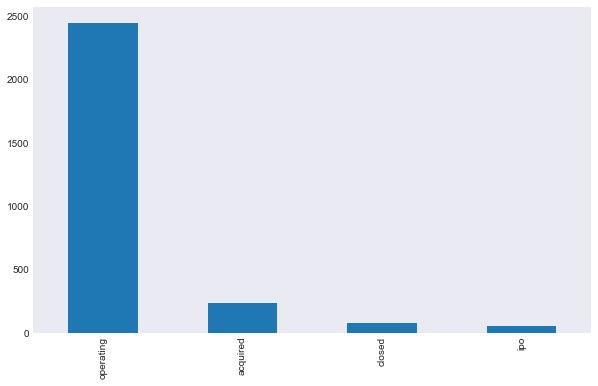

In [4]:
#frequencies of status variables
data['status'].value_counts().plot(kind = 'bar')

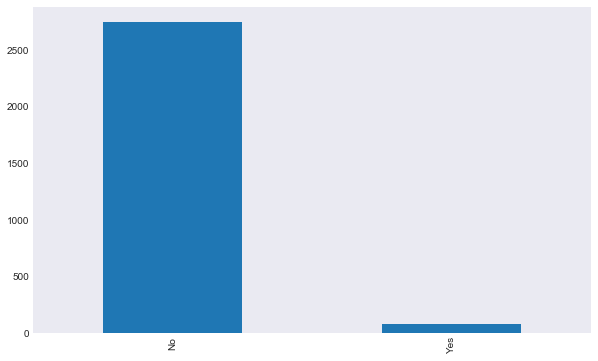

In [5]:
#frequncies of closed varible
data['closed'].value_counts().plot(kind = 'bar')

As you can see the vast majority of the data represents companies that are still operating. I am going to start with the easier two class response closed vs not closed, and then move on to the company status. The issue that we have here, and one that we need to keep in mind for our classification models, is that we have a huge difference in our response variable prior probabilities. The issue may arrive when evaluated performance, here is an example of why this may be an issue. Say we are modeling a rare disease where 99.99 percent of our data does not have the disease and 0.01 percent of our data does have the disease. Then a model that just predicts "no" every time has an error rate of 0.0001, which is very low, but our model obviously sucks.

I am going to focus a lot of my attention on random forests. Why? For several reason. For one, I personally like random forests as a classification method compared to older methods like LDA or logistic regreesion. Also, while learning machine learning in r in a different class, I kept seeing comments on stack overflow wondering why anyone would build a random forest NOT using sklean when I googled examples, so I need to know what all the hype is about. More importantly, random forest are great at providing information on variable importance compared to more flexible models like K-Nearest-Neighbors, and my goal is to find company/founder predictors of success and failure.

Now I can seperate the predictors and response variables.

In [6]:
#get two category response variable
closed = data['closed']
#get multi-level reponse variable
status = data['status']

In [7]:
#get list of predictor column names
predictor_list = data.columns.values[3:]

In [8]:
#get predictors data frame
predictors = data[predictor_list]
predictors.head()

,category_code,had_funding,has_investment,num_relationships,num_milestones,logo_height,logo_width,region,degree_type,institution,subject,birthplace,first_name,last_name
7,finance,No,Yes,3.0,4.0,120.0,120.0,Columbus,BBA,Ohio State University,"Entrepreneurship, Marketing",Ohio,Eric,Corl
8,games_video,Yes,No,2.0,0.0,89.0,250.0,Paris,MS,EPITECH,computer sciences and technologies,France,Nassim,Ghandour
11,mobile,Yes,No,45.0,3.0,165.0,650.0,Boston,BA,American University,Economics,"St. Petersburg, Russia",Veronika,Sonsev
18,web,Yes,No,1.0,1.0,67.0,250.0,SF Bay,MS,Supelec,Electrical Engineering,"Paris, France",Alain,Raynaud
22,public_relations,No,Yes,23.0,3.0,59.0,86.0,New York,Degree,University of Kentucky,Degree,Kentucky,Jack,Smith
